# 12. CV.inRange demo


## Setup
### Import modules

In [1]:
from PIL import Image
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, radians

### Set paths

In [2]:
sup_figure_path='/Users/danielbabin/GitHub/Green_Bands/Figures/Supplementary/'
data_path='/Users/danielbabin/GitHub/Green_Bands/Data/'
checkpoints_path='/Users/danielbabin/GitHub/Green_Bands/Data/Checkpoints/'
mis_images='/Users/danielbabin/GitHub/Green_Bands/Figures/Misc/'

## Filter image
### Import test image

In [4]:
raw=cv.imread(data_path+'DALL·E 2023-11-27 15.18.58 - green layers.png',1)
hsv=cv.cvtColor(raw, cv.COLOR_BGR2HSV)
rgb=cv.cvtColor(raw, cv.COLOR_BGR2RGB)

### Set thresholds

In [ ]:
hlow=36+18
slow=0
vlow=0

hhigh=206-18
shigh=100
vhigh=100

green_lowlims=(int(hlow/360*255),int(slow/100*255),int(vlow/100*255))
green_highlims=(int(hhigh/360*255),int(shigh/100*255),int(vhigh/100*255))
green_filtered=cv.inRange(hsv,green_lowlims,green_highlims)
binary_mask = np.where(green_filtered > 0, 255, 0).astype('uint8')m

### Mask image

In [5]:
result = cv.bitwise_and(raw, raw, mask=binary_mask)

# Option 2: Colored pixels on a transparent background
# Convert the original image to RGBA
image_rgba = cv.cvtColor(raw, cv.COLOR_BGR2BGRA)
image_rgba_lowalpha=image_rgba.copy()
image_rgba_lowalpha[:, :, 3]=80
image_rbga_lowalpha=cv.cvtColor(image_rgba_lowalpha, cv.COLOR_BGRA2RGBA)
# Create a 4 channel mask
mask_4_channel = cv.cvtColor(binary_mask, cv.COLOR_GRAY2BGRA)
# Set alpha channel to the mask
mask_4_channel[:, :, 3] = binary_mask
# Apply the 4 channel mask
result = cv.bitwise_and(image_rgba, mask_4_channel)

## Results

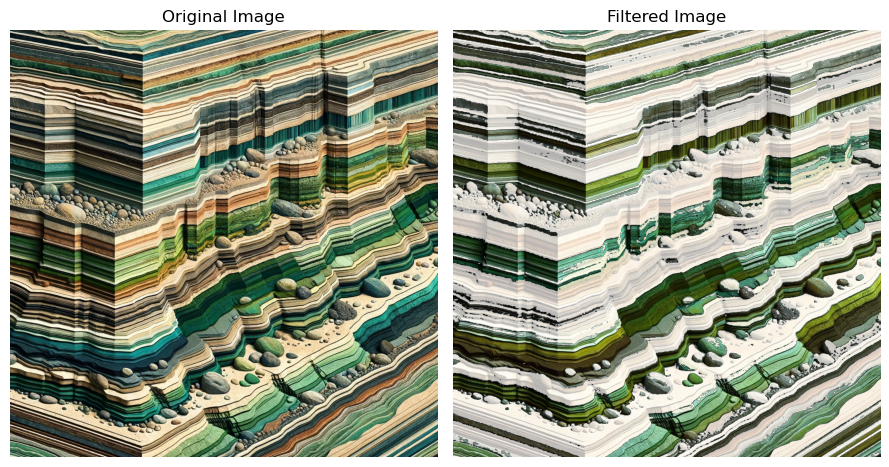

In [6]:
fig,axes=plt.subplots(ncols=2,figsize=(9,5))

ax=axes[0]
ax.imshow(rgb)
ax.axis('off')
ax.set_title('Original Image')

ax=axes[1]

ax.imshow(image_rbga_lowalpha)
ax.imshow(result)
ax.axis('off')
ax.set_title('Filtered Image')

plt.tight_layout()

## Visualize color range with cubes

### Total color range
#### Define range

In [7]:
all_hs=np.arange(0,360,18,dtype=int)
all_ss=np.arange(0,100,10,dtype=int)
all_vs=np.arange(0,100,10,dtype=int)

#### Make color cubes
##### Define values for boxes

In [9]:
def make_box(inside_corner,width1,width2,height):
    xmin,ymin,zmin=inside_corner
    x=[xmin,xmin,xmin+width1,xmin+width1,xmin,xmin,xmin+width1,xmin+width1]
    y=[ymin,ymin+width2,ymin+width2,ymin,ymin,ymin+width2,ymin+width2,ymin]
    z=[zmin,zmin,zmin,zmin,zmin+height,zmin+height,zmin+height,zmin+height]
    return([x,y,z])

In [10]:
all_boxes=np.empty((len(all_hs),len(all_ss),len(all_vs),3,8))
for i,h in enumerate(all_hs):
    for j,s in enumerate(all_ss):
        for k,v in enumerate(all_vs):
            all_boxes[i,j,k]=make_box(tuple((h,s,v)),17.99,9.99,9.99)

##### Make plotly objects

In [11]:
import plotly.express as px
import plotly.graph_objects as go

def get_color(boxname):
    h=np.mean(all_boxes[i,j,k][0])
    s=np.mean(all_boxes[i,j,k][1])
    v=np.mean(all_boxes[i,j,k][2])
    return 'hsv('+str(h)+','+str(s)+','+str(v)+')'

all_gos={}
for i,h in enumerate(all_hs):
    for j,s in enumerate(all_ss):
        for k,v in enumerate(all_vs):
            key=str(h)+'-'+str(s)+'-'+str(v)
            all_gos[key]=go.Mesh3d(x=all_boxes[i,j,k][0],y=all_boxes[i,j,k][1],
                               z=all_boxes[i,j,k][2],color=get_color(key),
                       # i, j and k give the vertices of triangles
                       i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
                       j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
                       k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
                       hoverinfo='skip',
                       opacity=1,
                       showscale=True)
all_all_list=list(all_gos.values())

#### Make image

In [32]:
fig=go.Figure(data=all_all_list)
zoom=1.4
angle = radians(160)
fig.update_layout(scene = dict(xaxis_title='Hue',
                               xaxis_title_font=dict(size=24),
                               xaxis_tickfont=dict(size=15),
                               yaxis_title='Saturation',
                               yaxis_title_font=dict(size=24),
                               yaxis_tickfont=dict(size=15),
                               zaxis_title='Value',
                               zaxis_title_font=dict(size=24),
                               zaxis_tickfont=dict(size=15)),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=-.3, z=-.5),
                                    eye=dict(x=3/zoom * cos(angle), y=3/zoom * sin(angle), z=.8/zoom)),
                  width=900/4*3,
                  height=800/4*3,
                  margin=dict(r=10, b=10, l=10, t=10))
# fig.show()
fig.write_image(mis_images+"demo.all.hsv.png",scale=3)

### Define green range 
#### Set range

In [33]:
g_hs=np.arange(54,188,18,dtype=int)
g_ss=np.arange(0,100,10,dtype=int)
g_vs=np.arange(0,100,10,dtype=int)

#### Make plotly objects

In [34]:
all_gos={}
for i,h in enumerate(all_hs):
    for j,s in enumerate(all_ss):
        for k,v in enumerate(all_vs):
            key=str(h)+'-'+str(s)+'-'+str(v)
            all_gos[key]=go.Mesh3d(x=all_boxes[i,j,k][0],y=all_boxes[i,j,k][1],
                               z=all_boxes[i,j,k][2],color=get_color(key),
                       # i, j and k give the vertices of triangles
                       i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
                       j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
                       k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
                       hoverinfo='skip',
                       opacity=.1,
                       showscale=True)
all_all_list=list(all_gos.values())

In [35]:
g_gos={}
for i,h in enumerate(all_hs):
    for j,s in enumerate(all_ss):
        for k,v in enumerate(all_vs):
            key=str(h)+'-'+str(s)+'-'+str(v)
            if h in g_hs:
                g_gos[key]=go.Mesh3d(x=all_boxes[i,j,k][0],y=all_boxes[i,j,k][1],
                                     z=all_boxes[i,j,k][2],color=get_color(key),
                           # i, j and k give the vertices of triangles
                           i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
                           j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
                           k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
                           hoverinfo='skip',
                           opacity=1,
                           showscale=True)
g_gos_list=list(g_gos.values())

#### Make image

In [36]:
fig=go.Figure(data=all_all_list+g_gos_list)
zoom=1.4
angle = radians(160)
fig.update_layout(scene = dict(xaxis_title='Hue',
                               xaxis_title_font=dict(size=24),
                               xaxis_tickfont=dict(size=15),
                               yaxis_title='Saturation',
                               yaxis_title_font=dict(size=24),
                               yaxis_tickfont=dict(size=15),
                               zaxis_title='Value',
                               zaxis_title_font=dict(size=24),
                               zaxis_tickfont=dict(size=15)),
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=-.3, z=-.5),
                                    eye=dict(x=3/zoom * cos(angle), y=3/zoom * sin(angle), z=.8/zoom)),
                  width=900/4*3,
                  height=800/4*3,
                  margin=dict(r=10, b=10, l=10, t=10))
# fig.show()
fig.write_image(mis_images+"demo.green.hsv.png",scale=3)

## Combine images for figure

In [30]:
all_hsv_blocks=cv.imread(checkpoints_path+'demo.all.hsv.png',1)
all_hsv_blocks_rgb=cv.cvtColor(all_hsv_blocks, cv.COLOR_BGR2RGB)

green_hsv_blocks=cv.imread(checkpoints_path+'demo.green.hsv.png',1)
green_hsv_blocks_rgb=cv.cvtColor(green_hsv_blocks, cv.COLOR_BGR2RGB)

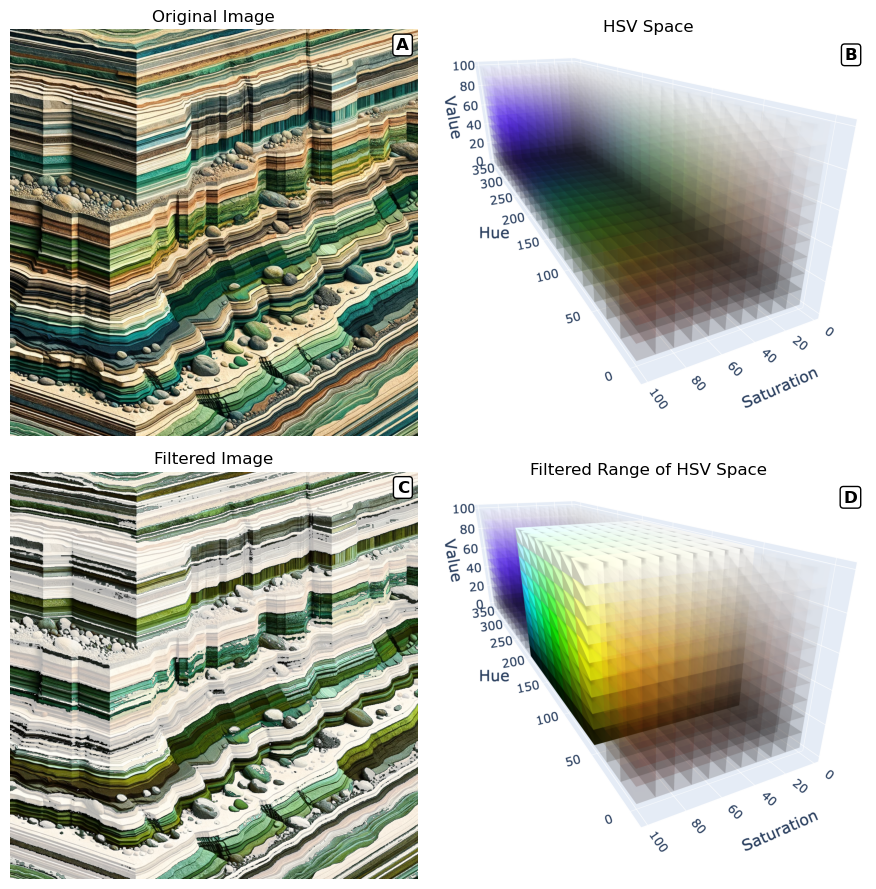

In [31]:
fig,axes=plt.subplots(ncols=2,nrows=2,figsize=(9,9))

axes=axes.flatten()

ax=axes[0]
ax.imshow(rgb)
ax.axis('off')
ax.set_title('Original Image')

ax=axes[1]
ax.imshow(all_hsv_blocks_rgb)
ax.axis('off')
ax.set_title('HSV Space')

ax=axes[2]

ax.imshow(image_rbga_lowalpha)
ax.imshow(result)
ax.axis('off')
ax.set_title('Filtered Image')

ax=axes[3]
ax.imshow(green_hsv_blocks_rgb)
ax.axis('off')
ax.set_title('Filtered Range of HSV Space')

letters=['A','B','C','D']
for n,ax in enumerate(axes):
    ax.annotate(letters[n],xy=(.98,.98),xycoords='axes fraction',ha='right',va='top',fontsize=12,fontweight='bold',
                bbox=dict(facecolor='w', edgecolor='k',boxstyle='round,pad=.2'))

plt.tight_layout()
plt.subplots_adjust(wspace=0)
fig.savefig(sup_figure_path+'Extended Data Figure 3 - OpenCV inRange function demo.png',dpi=300)